<a href="https://colab.research.google.com/github/larrymoreorless/Data-Viz/blob/master/Trellis_Bar_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%load_ext rpy2.ipython   

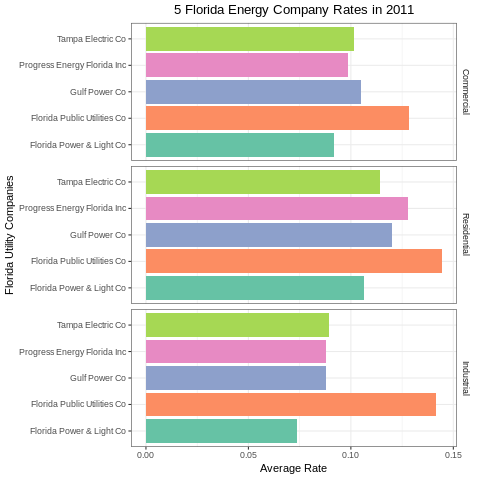

In [4]:
%%R

library(ggplot2)
library(dplyr)
library(reshape2)
library(lattice)
library(RColorBrewer)

#Import and explore data file
data <- read.csv(url("http://cs.ucf.edu/~wiegand/idc6700/datasets/iouzipcodes2011.csv"), sep=',', skip=2)
head(data)

#Filter Data for each of the 5 utility companies in Florida
FL_utilities <- filter(data, state == "FL")

#Summarize the average residential, commercial, and industry rates for each of these over all relevant zip codes 
groups <- group_by(FL_utilities, utility_name)
means <- summarise(groups,
                   Commercial = mean(comm_rate, na.rm = TRUE),
                   Residential = mean(res_rate, na.rm = TRUE),
                   Industrial = mean(ind_rate, na.rm = TRUE))

#Reshape the data for use in trellis bar plot
reshape <- melt(means, id.vars = "utility_name")

#Generate the plot
trellis <-ggplot(reshape, aes(y = value, x = utility_name, fill = utility_name)) +
  geom_bar(stat = "identity") +
  facet_grid(variable ~.) +
  coord_flip() +
  theme_bw() +
  ggtitle("5 Florida Energy Company Rates in 2011") +
  xlab("Florida Utility Companies") +
  ylab("Average Rate") +
  theme(legend.position = "none",
        plot.title = element_text(hjust = 0.5),
        strip.background = element_blank())
trellis + scale_fill_brewer(palette="Set2")
 

                  